In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [13]:
data = np.loadtxt("data.txt")

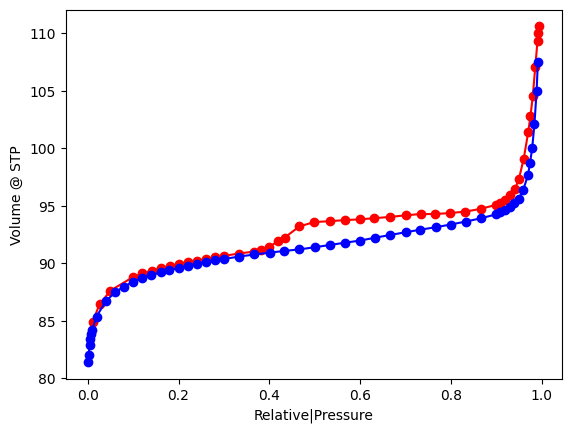

In [14]:
p,a=np.split(data,2,axis=1)
plt.ylabel('Volume @ STP')
plt.xlabel('Relative|Pressure')
a_max = np.argmax(a)
plt.plot(p[a_max:], a[a_max:], marker='o', c='r')
plt.plot(p[:a_max], a[:a_max], marker='o', c='b')
plt.show()

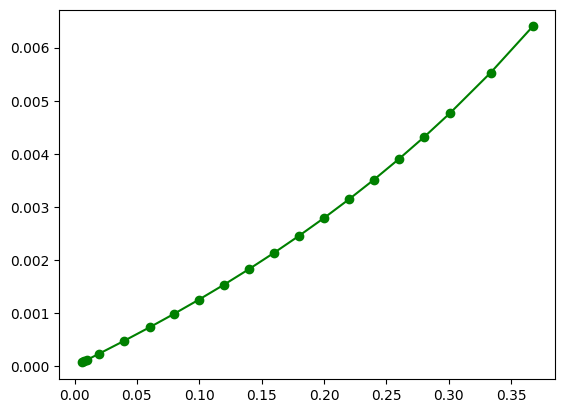

In [15]:
new_y = p/(a*(1-p))
N = 23
plt.plot(p[3:N], new_y[3:N], marker='o', c='g')
plt.show()

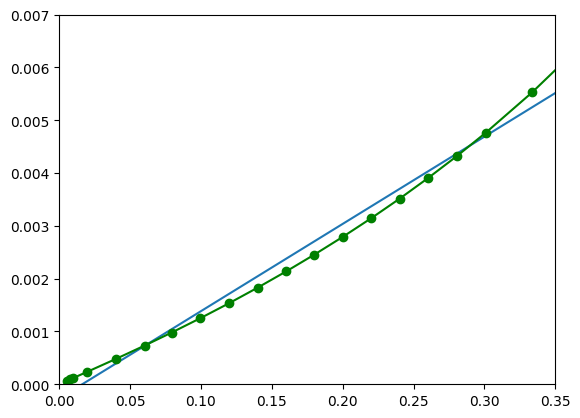

Line 0.016523847708894396*x + -0.0002677745429754911
R value 0.9855202400210799


In [16]:
def lin_reg(N0, N):
    model = LinearRegression()
    model.fit(p[N0:N], new_y[N0:N])
    r = model.score(p[N0:N], new_y[N0:N])
    k = model.coef_[0][0]
    b = model.intercept_[0]
    return k, b, r
k, b, r = lin_reg(3, N)
plt.xlim(0, 0.35)
plt.ylim(0, 0.007)
plt.plot([0, 1], [b, k + b], marker = 'o')
plt.plot(p[3:N], new_y[3:N], marker='o', c='g')
plt.show()
print(f"Line {k}*x + {b}")
print(f"R value {r}")

In [17]:
def calc_consts(k, b):
    c = k/b + 1
    am = 1 / (b*c) /22.4*10**-3
    Na =  6.022140 * (10**23)
    wm = 16.2 * (10**-20)
    As = Na * am * wm
    return am, c, As
am, c, As = calc_consts(k, b)
print(f"A = {As}")
print(f"Am = {am}\nC = {c}")

A = 267.91818873591035
Am = 0.0027462263910359086
C = -60.708060539596524


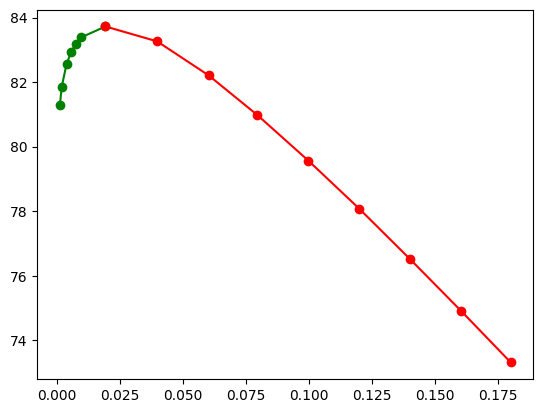

P/P0 max = [0.0192936]


In [18]:
P0 = 1
Rokkel_y = a * P0 * (1 - p)
Rokkel_y_max = np.argmax(Rokkel_y[:int(len(Rokkel_y)/2)])
plt.plot(p[:Rokkel_y_max+1], Rokkel_y[:Rokkel_y_max+1], marker='o', c='g')
plt.plot(p[Rokkel_y_max:15], Rokkel_y[Rokkel_y_max:15], marker='o', c='r')
plt.show()
print(f"P/P0 max = {p[Rokkel_y_max]}")

№1) с = 22109.48412717324
Line 0.011946369125772724*x + 5.403522492566373e-07

364.5543382230869
№2) с = 18827.17541007323
Line 0.011933711664842266*x + 6.338893272213406e-07

364.9381240724862
№3) с = 14809.572644508029
Line 0.011911535791068587*x + 8.043675833596393e-07

365.6122659835373
№4) с = 12951.700519193031
Line 0.011897831834994956*x + 9.187017966605192e-07

366.0298335614818
№5) с = 11878.860316263701
Line 0.011888690758697374*x + 1.0009118176292108e-06

366.3087150840117


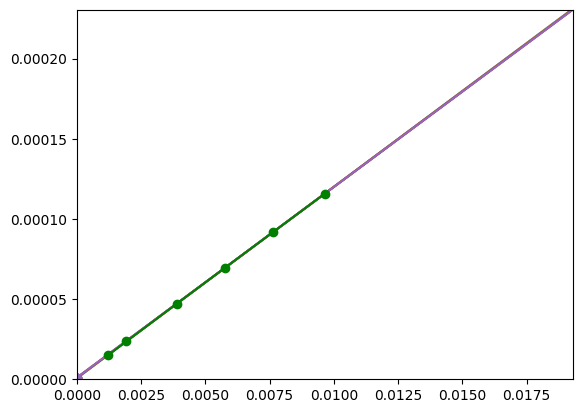

In [21]:
plt.xlim(0, p[Rokkel_y_max])
plt.ylim(0, new_y[Rokkel_y_max])
for i, p_min in enumerate(p[:Rokkel_y_max-1]):
    k, b, r = lin_reg(i, Rokkel_y_max)
    am, c, As = calc_consts(k, b)
    plt.plot([0, 1], [b, k + b], marker = 'o')
    print(f"№{i+1}) с = {c}")
    print(f"Line {k}*x + {b}\n")
    print(f"{As}")

plt.plot(p[:Rokkel_y_max], new_y[:Rokkel_y_max], marker='o', c='g')
plt.show()

a_micro = 3696.7010346798147 (моль)
S = 9.122994445498419 (м^2)


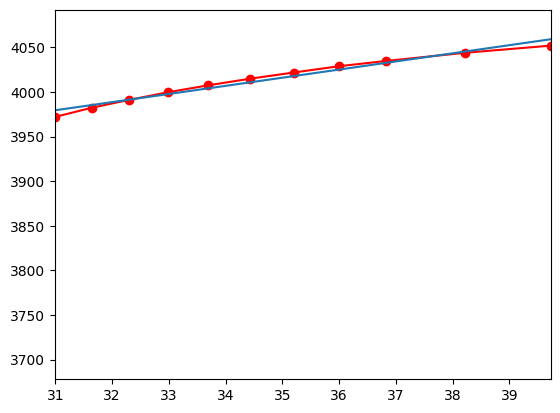

In [59]:
a0 = 27.1667
a1 = 23.4490
a2 = 26.7500
a3 = 6.5135
a4 = 0.9971
a5 = 0
b = p
compare_y = a0 + a1*b + a2*(b**2)+ a3*(b**3) +a4*(b**4) + a5*(b**5)

am = (a/22.4)*10**3 # sorb in mole


model = LinearRegression()
model.fit(compare_y[12:23], am[12:23])
r = model.score(compare_y[12:23], am[12:23])
k = model.coef_[0][0]
b = model.intercept_[0]

x1 = np.array([0])
x2 = compare_y[23]
y1 = model.predict(x1.reshape(1,-1))[0]
y2 = model.predict(x2.reshape(1,-1))[0]

print(f"a_micro = {b} (моль)")
print(f"S = {k} (м^2)")
plt.xlim(compare_y[12], compare_y[22])
plt.plot(compare_y[12:23], am[12:23], marker='o', c='r')
plt.plot([x1, x2], [y1, y2], marker = 'o')
plt.show()